In [64]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statistics
import os
from zxcvbn import zxcvbn
%matplotlib inline

In [65]:
def find_file(filename):
    current_dir = os.getcwd()
    
    # Check current directory
    if filename in os.listdir(current_dir):
        return os.path.join(current_dir, filename)
    
    # Check parent directory
    parent_dir = os.path.dirname(current_dir)
    for root, dirs, files in os.walk(parent_dir):
        if filename in files:
            return os.path.join(root, filename)
    
    return None

file_path = find_file("common_passwords.csv")
if file_path:
    print(f"Found at: {file_path}")
    df_passwords = pd.read_csv(file_path)
else:
    print("File not found")

Found at: /Users/kebe/Statistical-analysis-of-Password-strength /Option 1 Using Visual Studio Code/common_passwords.csv


In [66]:
# Used to set the maximum rows and columns to display.
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

In [67]:
df_passwords.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1


In [68]:
df_passwords.columns

Index(['password', 'length', 'num_chars', 'num_digits', 'num_upper',
       'num_lower', 'num_special', 'num_vowels', 'num_syllables'],
      dtype='object')

In [69]:
# function to calculate the character-sets
def sizeof_character_set(password):
    
    character_set_size = 0        
    # Checks for numbers
    if any(char.isdigit() for char in password):
        character_set_size += 10  
    
    # Checks for lower case strings    
    if any(char.islower() for char in password):
        character_set_size += 26
        
    # Checks for upper case strings  
    if any(char.isupper() for char in password):
        character_set_size += 26  
        
    # Checks for special characters
    if any(not(char.isalnum()) for char in password):
        character_set_size += 33
    
    # print(character_set_size)
    return character_set_size

In [70]:
# To calculate Entropy we make use of the character-set function defined above
def calculate_password_entropy(password):
    combination = sizeof_character_set(password)**len(password)
    return round(math.log2(combination))

In [71]:
def zxcvbn_entropy(password):
    result = zxcvbn(password)
    calc_zxcvbn_entropy = round(result["guesses_log10"] * math.log2(10))
    return calc_zxcvbn_entropy

In [72]:
def zxcvbn_score(password):
    result = zxcvbn(password)
    return result['score']

In [73]:
def zxcvbn_crack_time(password):
    result = zxcvbn(password)
    return result['crack_times_display']['online_throttling_100_per_hour']

In [74]:
df_passwords['character_set_size'] = df_passwords['password'].apply(sizeof_character_set)

In [75]:
df_passwords['entropy'] = df_passwords['password'].apply(calculate_password_entropy)

In [76]:
df_passwords['zxcvbn_entropy'] = df_passwords['password'].apply(zxcvbn_entropy)

In [77]:
df_passwords['zxcvbn_score'] = df_passwords['password'].apply(zxcvbn_score)

In [78]:
df_passwords['zxcvbn_crack_time'] = df_passwords['password'].apply(zxcvbn_crack_time)

In [79]:
df_passwords['character_set_size'].describe()

count    10000.000000
mean        23.932800
std          7.978938
min         10.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         69.000000
Name: character_set_size, dtype: float64

In [80]:
df_passwords['entropy'].describe()

count    10000.000000
mean        29.749100
std          6.916266
min         10.000000
25%         27.000000
50%         28.000000
75%         33.000000
max         95.000000
Name: entropy, dtype: float64

In [81]:
df_passwords['zxcvbn_entropy'].describe()

count    10000.000000
mean        10.373700
std          2.246943
min          1.000000
25%          9.000000
50%         11.000000
75%         12.000000
max         21.000000
Name: zxcvbn_entropy, dtype: float64

In [82]:
df_passwords['zxcvbn_score'].describe()

count    10000.000000
mean         0.653800
std          0.475992
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: zxcvbn_score, dtype: float64

In [83]:
df_passwords['zxcvbn_crack_time'].describe()

count      10000
unique        98
top       2 days
freq        2137
Name: zxcvbn_crack_time, dtype: object

In [84]:
df_passwords.head(100)

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables,character_set_size,entropy,zxcvbn_entropy,zxcvbn_score,zxcvbn_crack_time
0,123456,6,0,6,0,0,0,0,1,10,20,1,0,1 minute
1,password,8,8,0,0,8,0,2,2,26,38,2,0,2 minutes
2,12345678,8,0,8,0,0,0,0,1,10,27,2,0,2 minutes
3,qwerty,6,6,0,0,6,0,1,3,26,28,2,0,3 minutes
4,123456789,9,0,9,0,0,0,0,1,10,30,3,0,4 minutes
5,12345,5,0,5,0,0,0,0,1,10,17,3,0,4 minutes
6,1234,4,0,4,0,0,0,0,1,10,13,3,0,5 minutes
7,111111,6,0,6,0,0,0,0,1,10,20,3,0,5 minutes
8,1234567,7,0,7,0,0,0,0,1,10,23,3,0,6 minutes
9,dragon,6,6,0,0,6,0,2,2,26,28,3,0,7 minutes


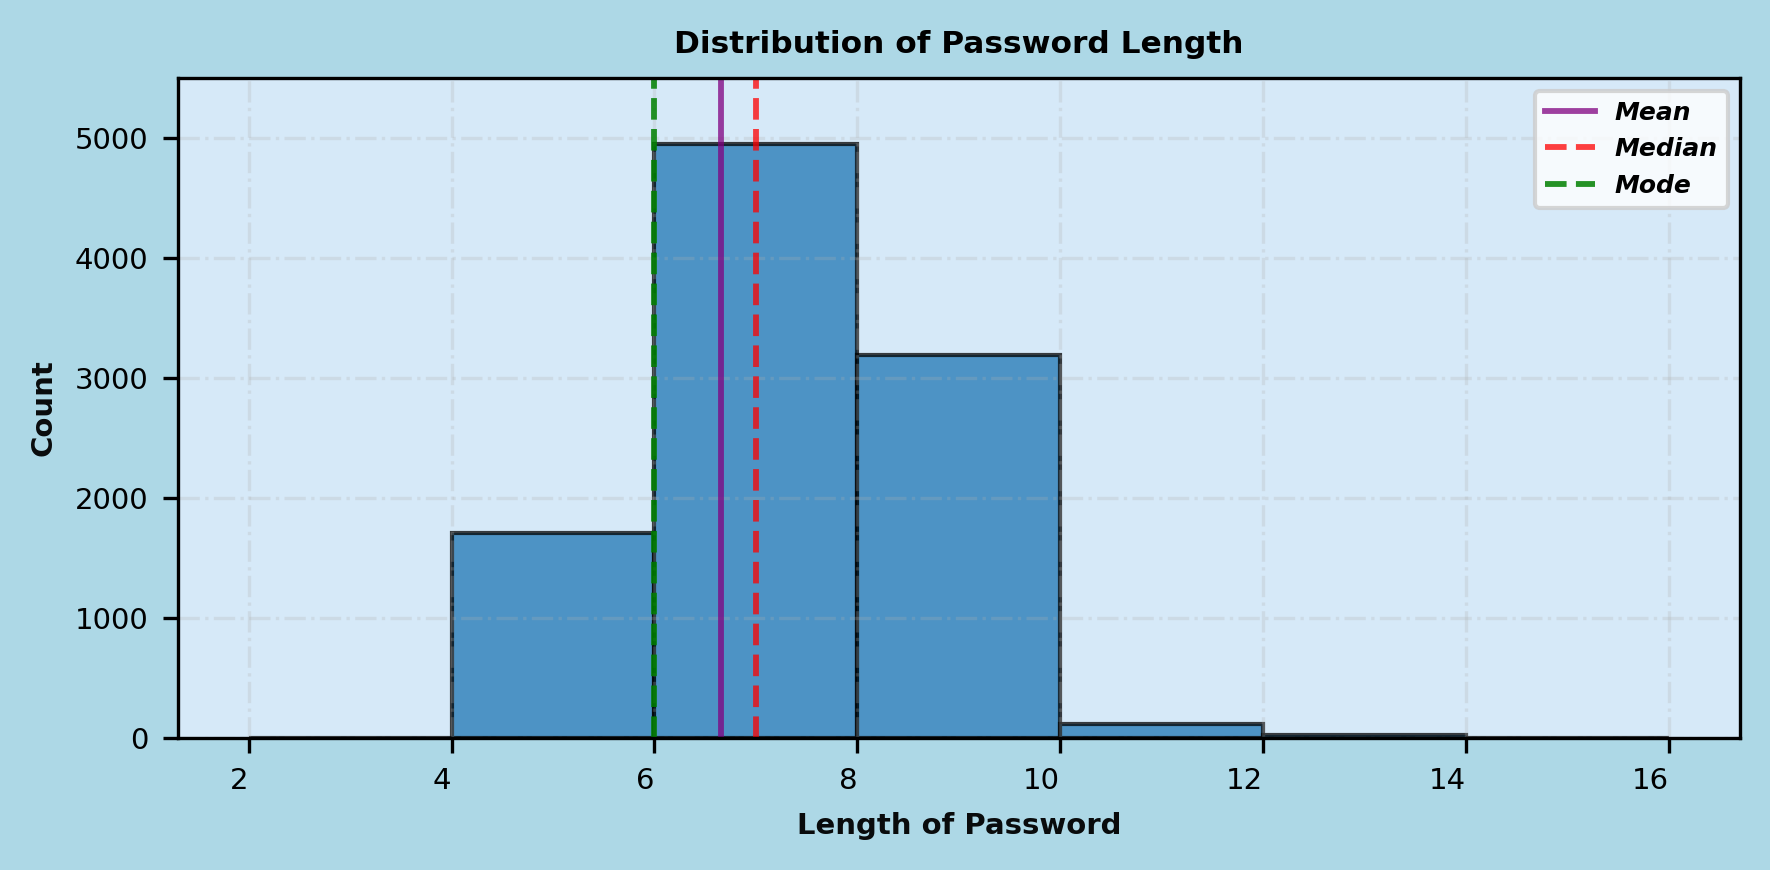

In [85]:
# Histogram Length Distribution
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the required data
length_data = df_passwords['length']
length_mean = df_passwords['length'].mean()
length_median = df_passwords['length'].median()
length_mode = statistics.mode(df_passwords['length'])

# Defines the bins used
# bins = np.arange(2, 17, 2)
bins = [2, 4, 6, 8, 10, 12, 14, 16]

# The histogram plot
ax.hist(length_data, bins=bins, edgecolor='k', alpha=0.75, lw=1,)

# Plots the vertical line of mean and median
ax.axvline(length_mean, color='purple', label='Mean', linestyle='-', lw=1.4, alpha=0.75)
ax.axvline(length_median, color='red', label='Median', linestyle='--', lw=1.4, alpha=0.75)
ax.axvline(length_mode, color='green', label='Mode', linestyle='--', lw=1.4, alpha=0.85)

# Set x-ticks to bin edges
ax.set_xticks(bins)
ax.set_xticklabels(bins, fontsize=5, font='DejaVu Sans', ha='right')
ax.tick_params(axis='x', labelsize=7)

# use log scale (to enhance visibility for bins with low values)
# ax.set_yscale('log')

y_ticks = np.arange(0, 5501, 1000)
ax.set_ylim(0, 5500)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=5, font='DejaVu Sans')
ax.tick_params(axis='y', labelsize=7)

# Adds gridlines
plt.grid(True, linestyle='-.', alpha=0.25)

# Add labels and title
ax.set_title(f'Distribution of Password Length', font='DejaVu Sans', fontsize=7.5, weight='bold')
ax.set_xlabel('Length of Password', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.set_ylabel('Count', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.legend(prop={'family': 'DejaVu Sans', 'size': 6, 'weight': 'bold', 'style': 'italic'}, loc='upper right')

plt.tight_layout()

In [86]:
length_data.describe()

count    10000.000000
mean         6.651300
std          1.370947
min          3.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         16.000000
Name: length, dtype: float64

Text(0, 0.5, 'Count')

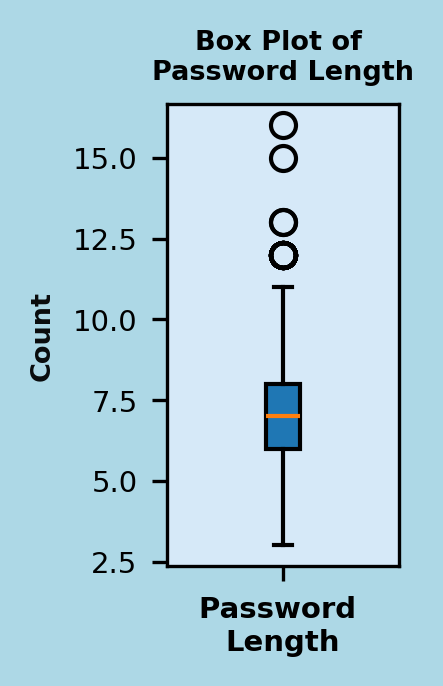

In [87]:
# Box Plot Length
# Create figure and axes
fig, ax = plt.subplots(figsize=(1,2), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')
ax.boxplot(length_data, patch_artist=True)
ax.set_xticklabels(['Password \nLength'], fontsize=6.5,  weight='bold')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.set_title(f'Box Plot of \nPassword Length', font='DejaVu Sans', fontsize=6.5, weight='bold')
ax.set_ylabel('Count', fontsize=6.5, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')

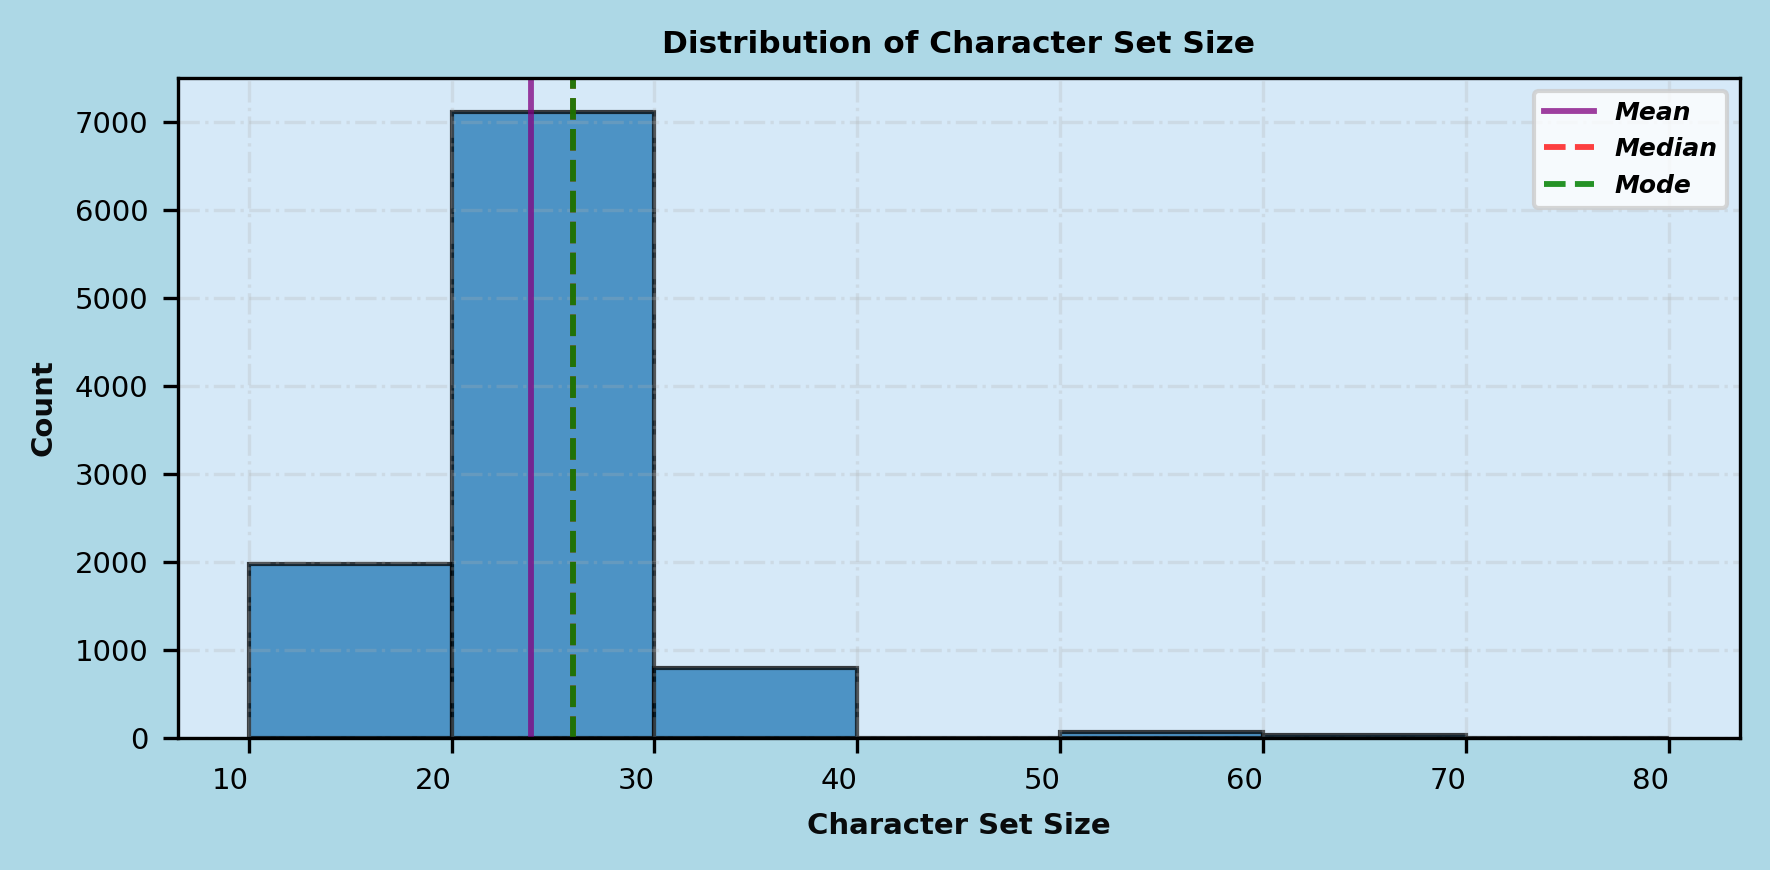

In [88]:
# Histogram Length Distribution
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the data required
character_set_data = df_passwords['character_set_size']
character_set_mean = df_passwords['character_set_size'].mean()
character_set_median = df_passwords['character_set_size'].median()
character_set_mode = statistics.mode(df_passwords['character_set_size'])

# bins = np.arange(10, 81, 10)
bins = [10, 20, 30, 40, 50, 60, 70, 80]
ax.hist(character_set_data, bins=bins, edgecolor='k', alpha=0.75, lw=1)

# Plots the vertical line of mean and median
ax.axvline(character_set_mean, color='purple', label='Mean', linestyle='-', lw=1.4, alpha=0.75)
ax.axvline(character_set_median, color='red', label='Median', linestyle='--', lw=1.4, alpha=0.75)
ax.axvline(character_set_mode, color='green', label='Mode', linestyle='--', lw=1.4, alpha=0.85)

# Set x-ticks to bin edges
###
ax.set_xticks(bins)
ax.set_xticklabels(bins, fontsize=7, font='DejaVu Sans', ha='right')
ax.tick_params(axis='x', labelsize=7)

# use log scale (to enhance visibility for bins with low values)
# ax.set_yscale('log')

y_ticks = np.arange(0, 7501, 1000)
ax.set_ylim(0, 7500)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=7, font='DejaVu Sans')
ax.tick_params(axis='y', labelsize=7)

# Adds gridlines
plt.grid(True, linestyle='-.', alpha=0.25)

# Add labels and title
ax.set_title(f'Distribution of Character Set Size', font='DejaVu Sans', fontsize=7.5, weight='bold')
ax.set_xlabel('Character Set Size', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.set_ylabel('Count', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.legend(prop={'family': 'DejaVu Sans', 'size': 6, 'weight': 'bold', 'style': 'italic'}, loc='upper right')

plt.tight_layout()

In [89]:
character_set_data.describe()

count    10000.000000
mean        23.932800
std          7.978938
min         10.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         69.000000
Name: character_set_size, dtype: float64

Text(0, 0.5, 'Count')

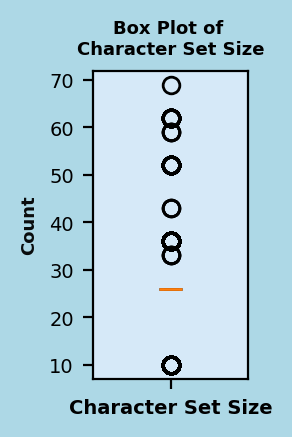

In [90]:
# Box Plot Character Set Size
# Create figure and axes
fig, ax = plt.subplots(figsize=(1,2), dpi=200, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')
ax.boxplot(character_set_data, patch_artist=True)
ax.set_xticklabels(['Character Set Size'],  fontsize=6.5,  weight='bold')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.set_title(f'Box Plot of \nCharacter Set Size', font='DejaVu Sans', fontsize=6.5, weight='bold')
ax.set_ylabel('Count', fontsize=6.5, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')

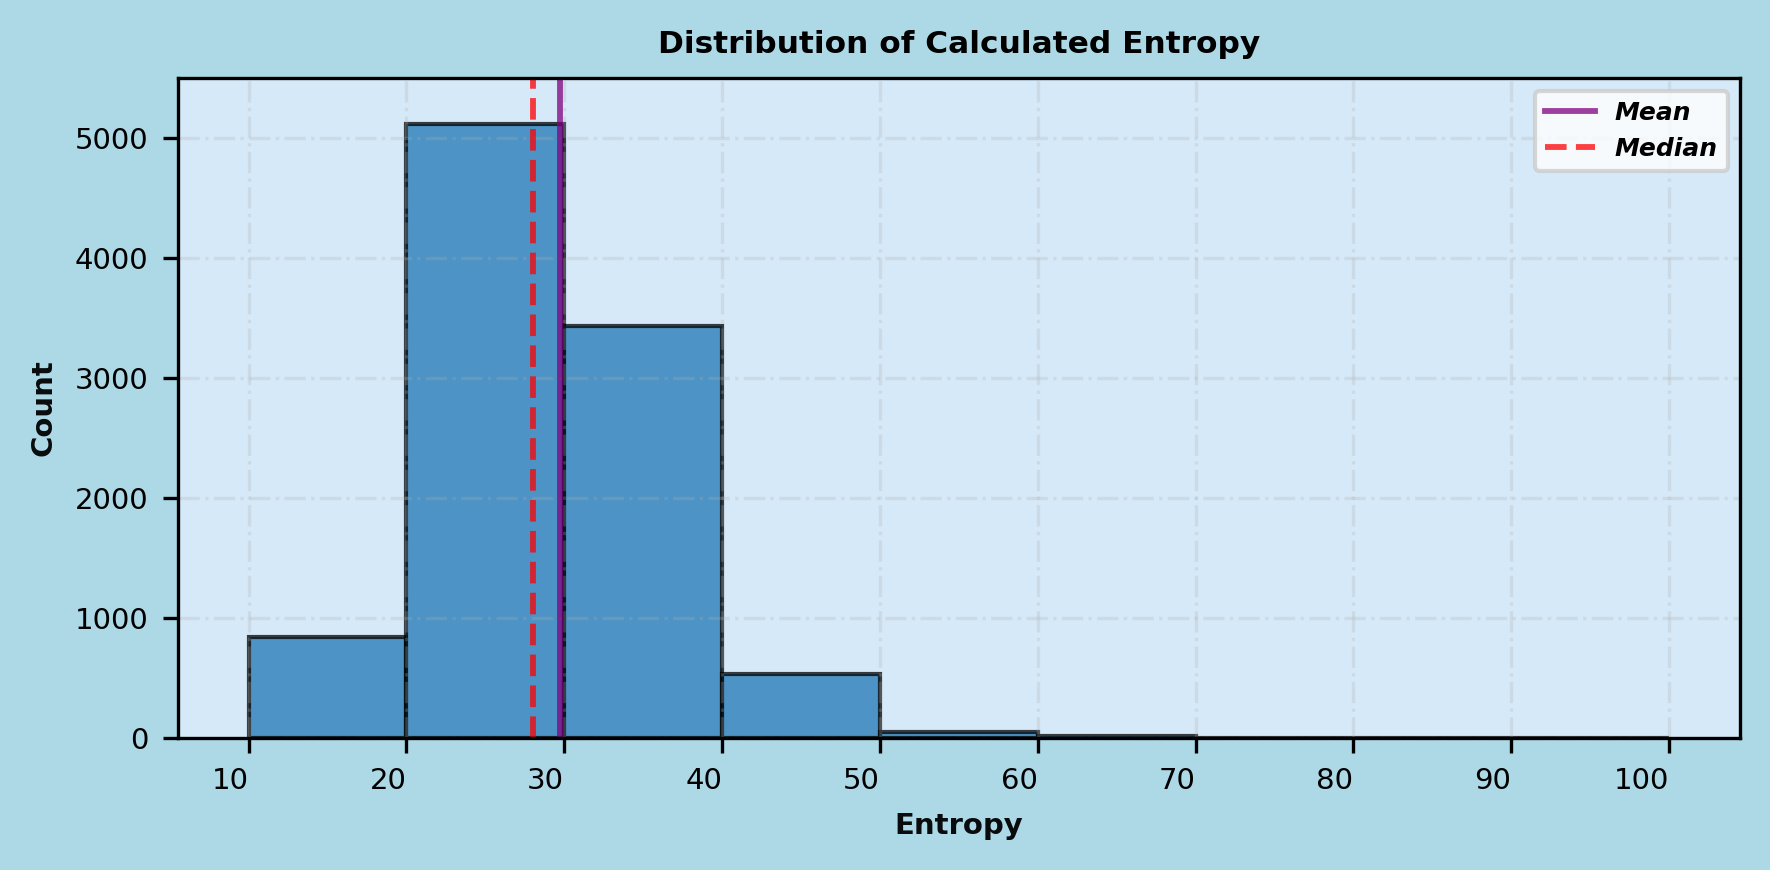

In [91]:
# Histogram of Entropy Distribution
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the required data
entropy_data = df_passwords['entropy']
entropy_mean = df_passwords['entropy'].mean()
entropy_median = df_passwords['entropy'].median()


# Defines the bins used
bins = np.arange(10, 101, 10)
# bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# The histogram plot
ax.hist(entropy_data, bins=bins, edgecolor='k', alpha=0.75, lw=1,)

# Plots the vertical line of mean and median
ax.axvline(entropy_mean, color='purple', label='Mean', linestyle='-', lw=1.4, alpha=0.75)
ax.axvline(entropy_median, color='red', label='Median', linestyle='--', lw=1.4, alpha=0.75)

# Set x-ticks to bin edges
ax.set_xticks(bins)
ax.set_xticklabels(bins, fontsize=7, font='DejaVu Sans', ha='right')
ax.tick_params(axis='x', labelsize=7)

# use log scale (to enhance visibility for bins with low values)
# ax.set_yscale('log')

# Setting y-ticks without using log scale
y_ticks = np.arange(0, 5501, 1000)
ax.set_ylim(0, 5500)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=7, font='DejaVu Sans')
ax.tick_params(axis='y', labelsize=7)

# Adds gridlines
plt.grid(True, linestyle='-.', alpha=0.25)

# Add labels and title
ax.set_title(f'Distribution of Calculated Entropy', font='DejaVu Sans', fontsize=7.5, weight='bold')
ax.set_xlabel('Entropy', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.set_ylabel('Count', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.legend(prop={'family': 'DejaVu Sans', 'size': 6, 'weight': 'bold', 'style': 'italic'}, loc='upper right')

plt.tight_layout()

# fig.savefig('path_to_file/file_name.jpeg')

In [92]:
entropy_data.describe()

count    10000.000000
mean        29.749100
std          6.916266
min         10.000000
25%         27.000000
50%         28.000000
75%         33.000000
max         95.000000
Name: entropy, dtype: float64

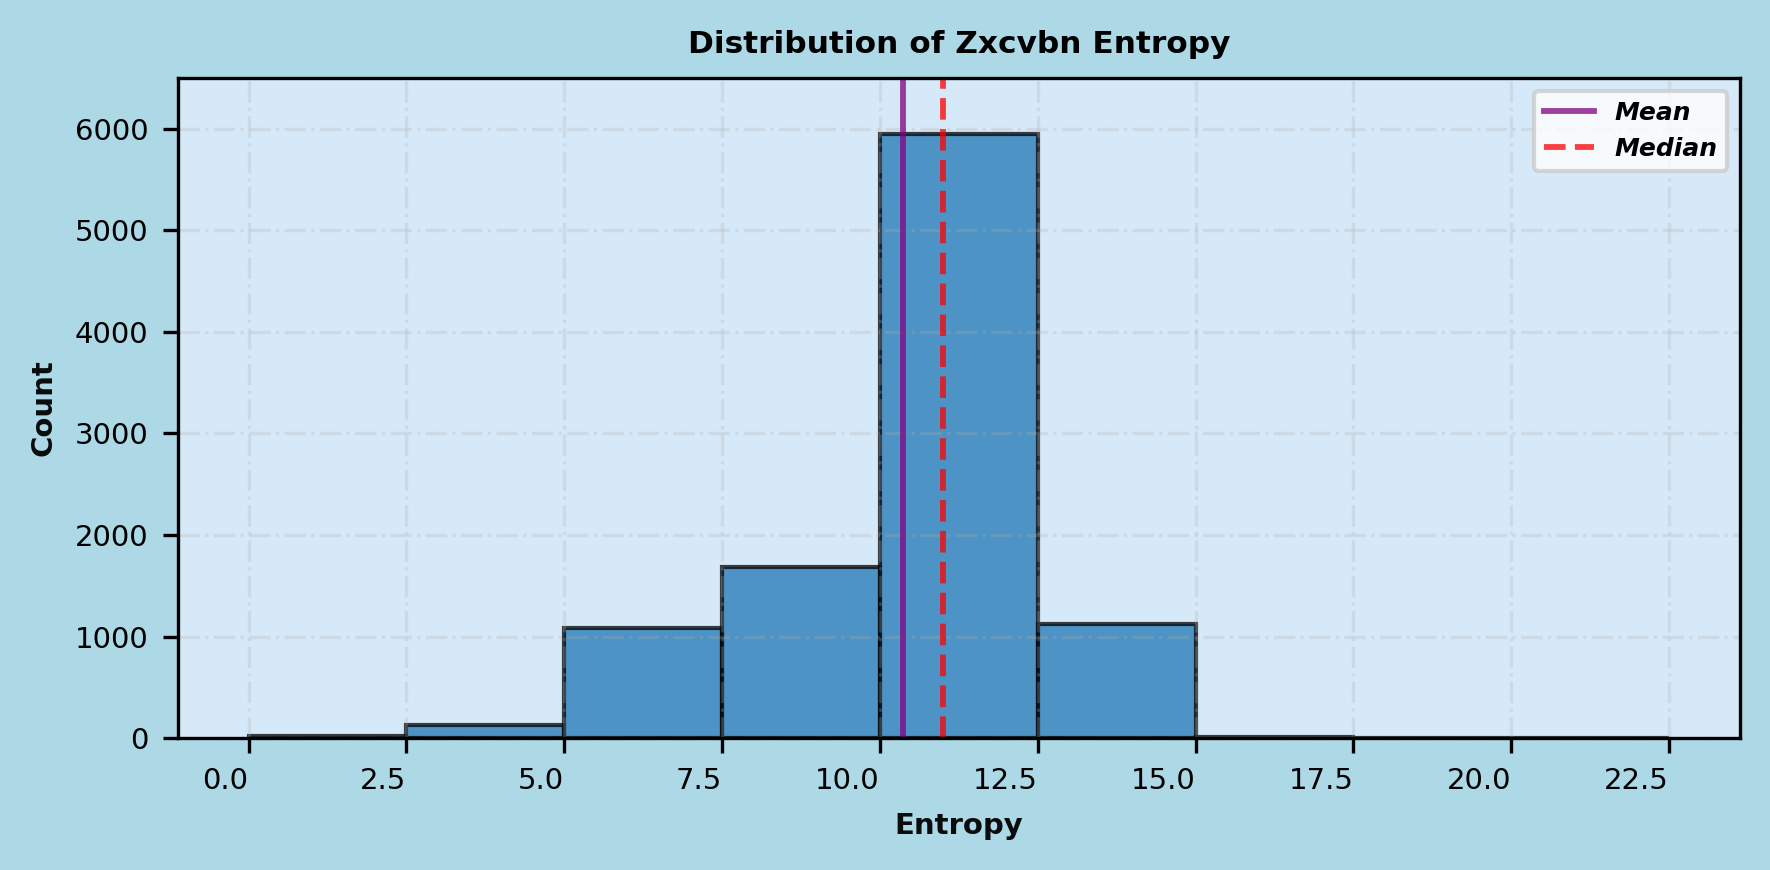

In [93]:
# Histogram of Entropy Distribution
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the required data
zxcvbn_entropy_data = df_passwords['zxcvbn_entropy']
zxcvbn_entropy_mean = df_passwords['zxcvbn_entropy'].mean()
zxcvbn_entropy_median = df_passwords['zxcvbn_entropy'].median()


# Defines the bins used
bins = np.arange(0, 25, 2.5)
# bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# The histogram plot
ax.hist(zxcvbn_entropy_data, bins=bins, edgecolor='k', alpha=0.75, lw=1,)
# ax.hist(zxcvbn_entropy_data, edgecolor='k', alpha=0.75, lw=1)

# Plots the vertical line of mean and median
ax.axvline(zxcvbn_entropy_mean, color='purple', label='Mean', linestyle='-', lw=1.4, alpha=0.75)
ax.axvline(zxcvbn_entropy_median, color='red', label='Median', linestyle='--', lw=1.4, alpha=0.75)

# Set x-ticks to bin edges
ax.set_xticks(bins)
ax.set_xticklabels(bins, fontsize=7, font='DejaVu Sans', ha='right')
ax.tick_params(axis='x', labelsize=7)
# use log scale (to enhance visibility for bins with low values)
# ax.set_yscale('log')

# Setting y-ticks without using log scale
y_ticks = np.arange(0, 6001, 1000)
ax.set_ylim(0, 6500)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=7, font='DejaVu Sans')
ax.tick_params(axis='y', labelsize=7)

# Adds gridlines
plt.grid(True, linestyle='-.', alpha=0.25)

# Add labels and title
ax.set_title(f'Distribution of Zxcvbn Entropy', font='DejaVu Sans', fontsize=7.5, weight='bold')
ax.set_xlabel('Entropy', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.set_ylabel('Count', fontsize=7, color='black', alpha=0.95, font='DejaVu Sans', weight='bold')
ax.legend(prop={'family': 'DejaVu Sans', 'size': 6, 'weight': 'bold', 'style': 'italic'}, loc='upper right')

plt.tight_layout()

# fig.savefig('path_to_file/file_name.jpeg')

In [94]:
zxcvbn_entropy_data.describe()

count    10000.000000
mean        10.373700
std          2.246943
min          1.000000
25%          9.000000
50%         11.000000
75%         12.000000
max         21.000000
Name: zxcvbn_entropy, dtype: float64

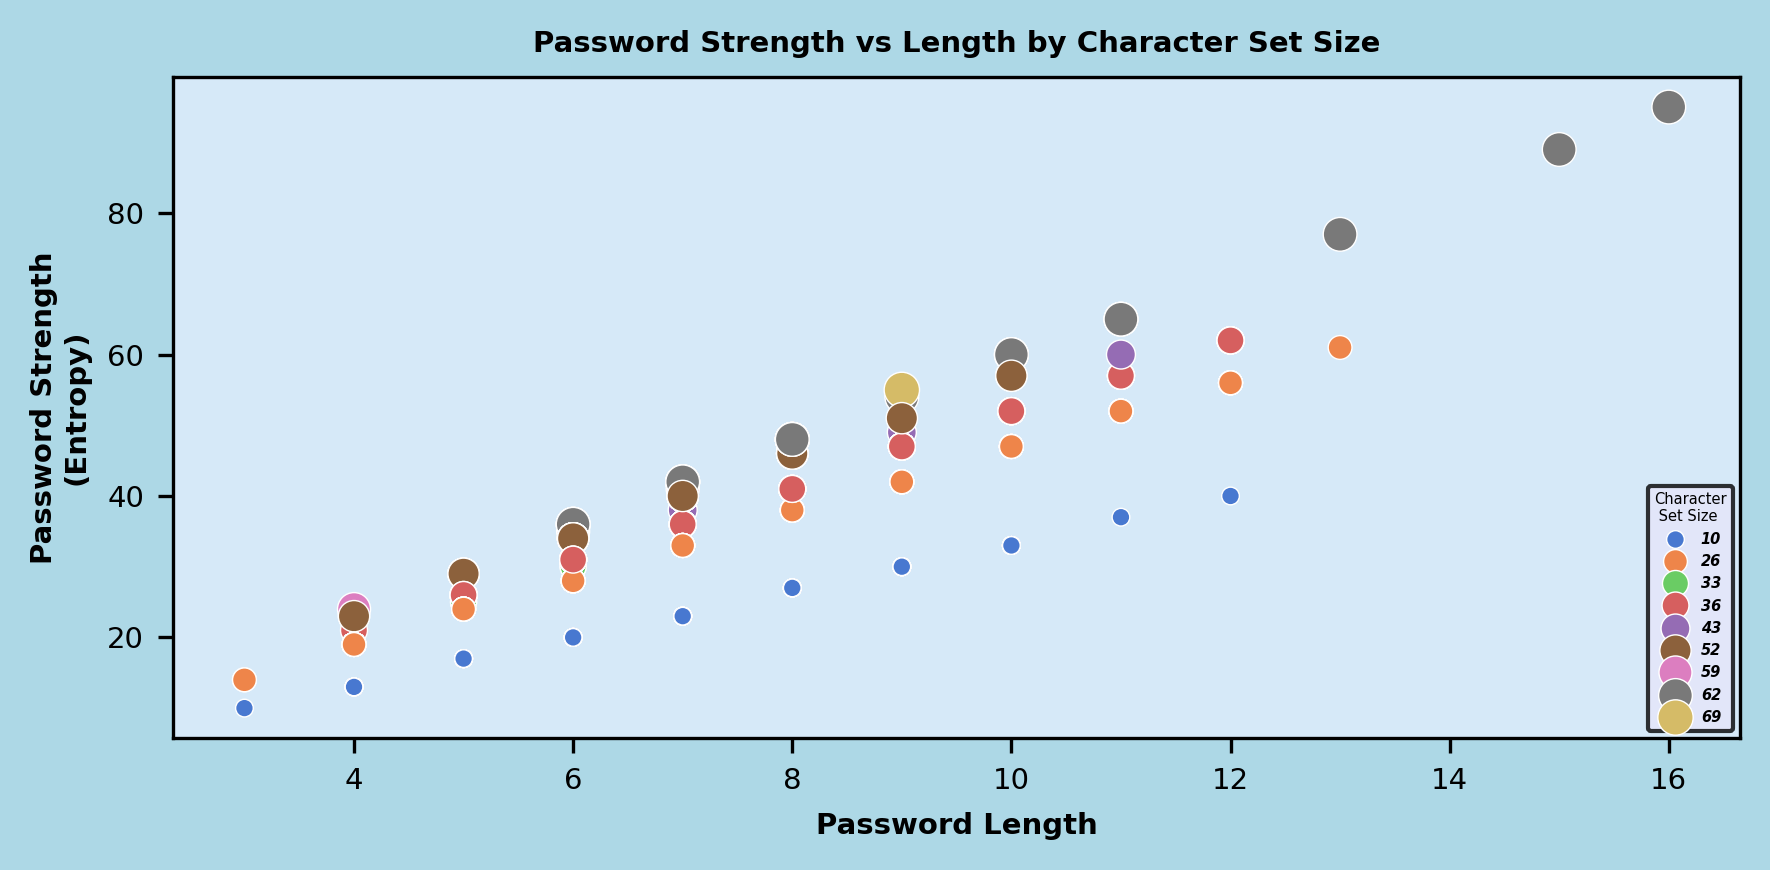

In [95]:
# scatter plot
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the required data and build DataFrame for seaborn
data = pd.DataFrame({
    'length_data': df_passwords['length'],
    'entropy_data': df_passwords['entropy'],
    'charset_size_data': df_passwords['character_set_size']    
})

# Seaborn Plot
sns.scatterplot(
    x='length_data',
    y='entropy_data',
    hue='charset_size_data',
    size='charset_size_data',
    data=data,
    palette='muted',  #bright, muted, colorblind, deep
    legend='full',
    ax=ax
)
# set the title
ax.set_title('Password Strength vs Length by Character Set Size', fontsize=7, weight='bold')
ax.set_xlabel('Password Length', fontsize=7, weight='bold')
ax.set_ylabel('Password Strength\n(Entropy)', fontsize=7, weight='bold')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.legend(
    title='Character\n Set Size', 
    title_fontsize=3.5,
    loc='lower right', 
    prop={'size': 3.5, 'weight': 'bold', 'style': 'italic'},
    edgecolor='k',
    facecolor='lavender'
)

plt.tight_layout()
# plt.show()


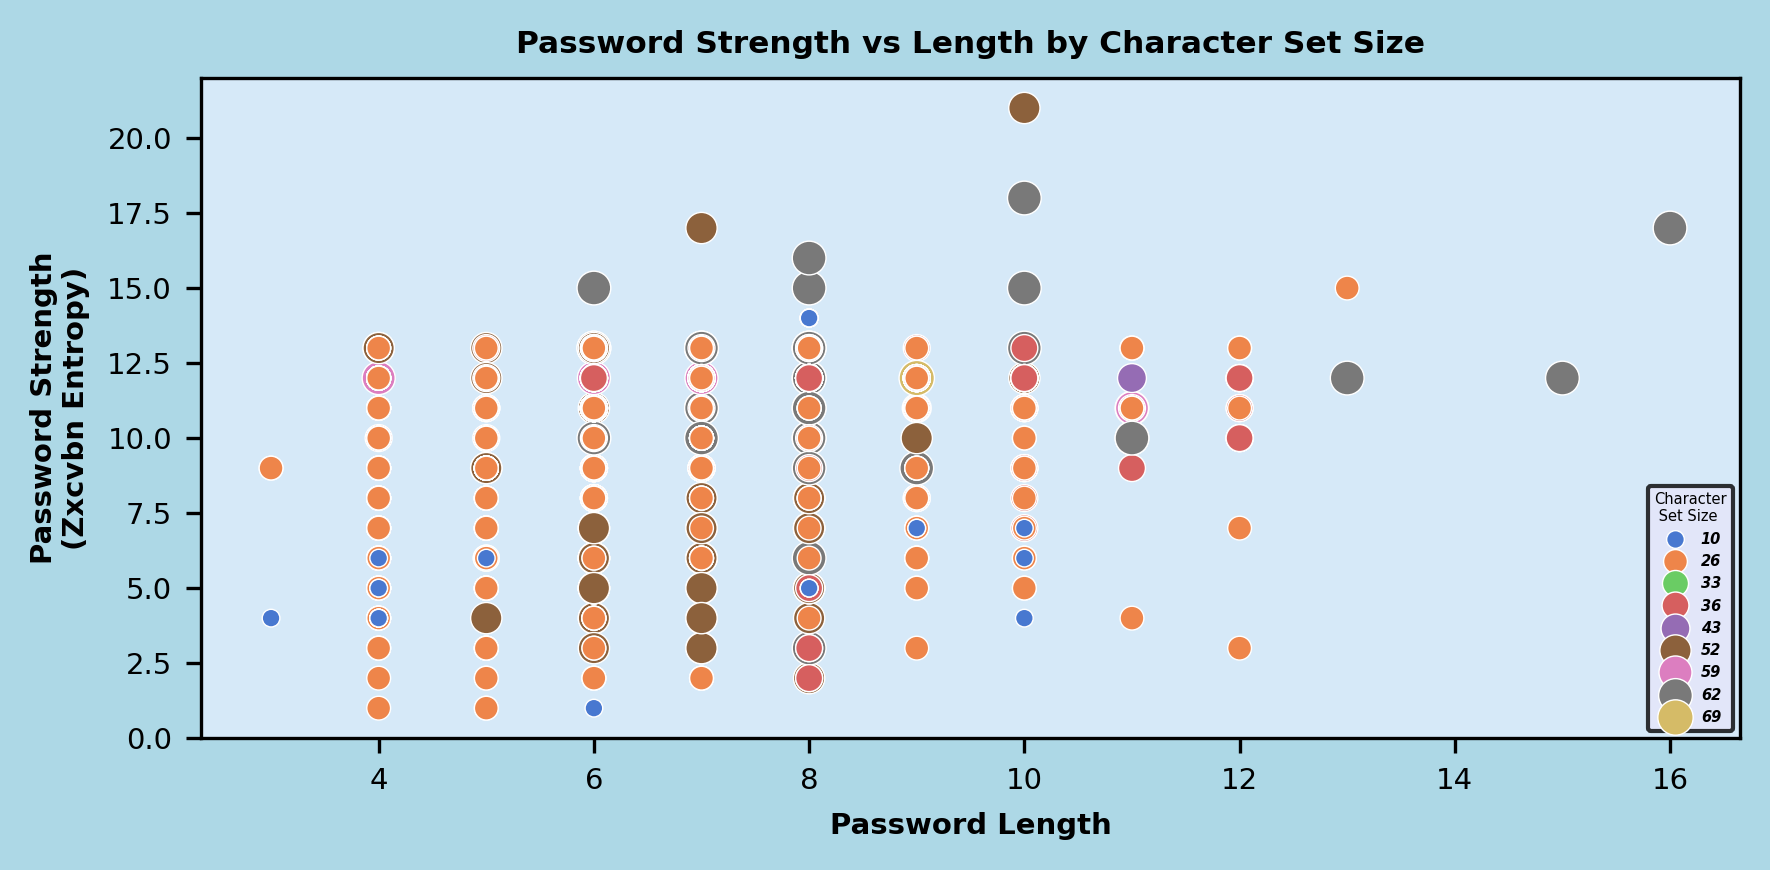

In [96]:
# scatter plot
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)
ax.set_facecolor('#E6F0FFBB')

# Extract the required data and build DataFrame for seaborn
data = pd.DataFrame({
    'length_data': df_passwords['length'],
    'zx_entropy_data': df_passwords['zxcvbn_entropy'],
    'charset_size_data': df_passwords['character_set_size']    
})

# Seaborn Plot
sns.scatterplot(
    x='length_data',
    y='zx_entropy_data',
    hue='charset_size_data',
    size='charset_size_data',
    data=data,
    palette='muted',  #bright, muted, colorblind, deep
    legend='full',
    ax=ax
)
# set the title
ax.set_title('Password Strength vs Length by Character Set Size', fontsize=7.5, weight='bold')
ax.set_xlabel('Password Length', fontsize=7, weight='bold')
ax.set_ylabel('Password Strength\n(Zxcvbn Entropy)', fontsize=7, weight='bold')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.legend(
    title='Character\n Set Size', 
    title_fontsize=3.5,
    loc='lower right', # (0.77, 0.02)
    prop={'size': 3.5, 'weight': 'bold', 'style': 'italic'},
    edgecolor='k',
    facecolor='lavender'
)

plt.tight_layout()
# plt.show()

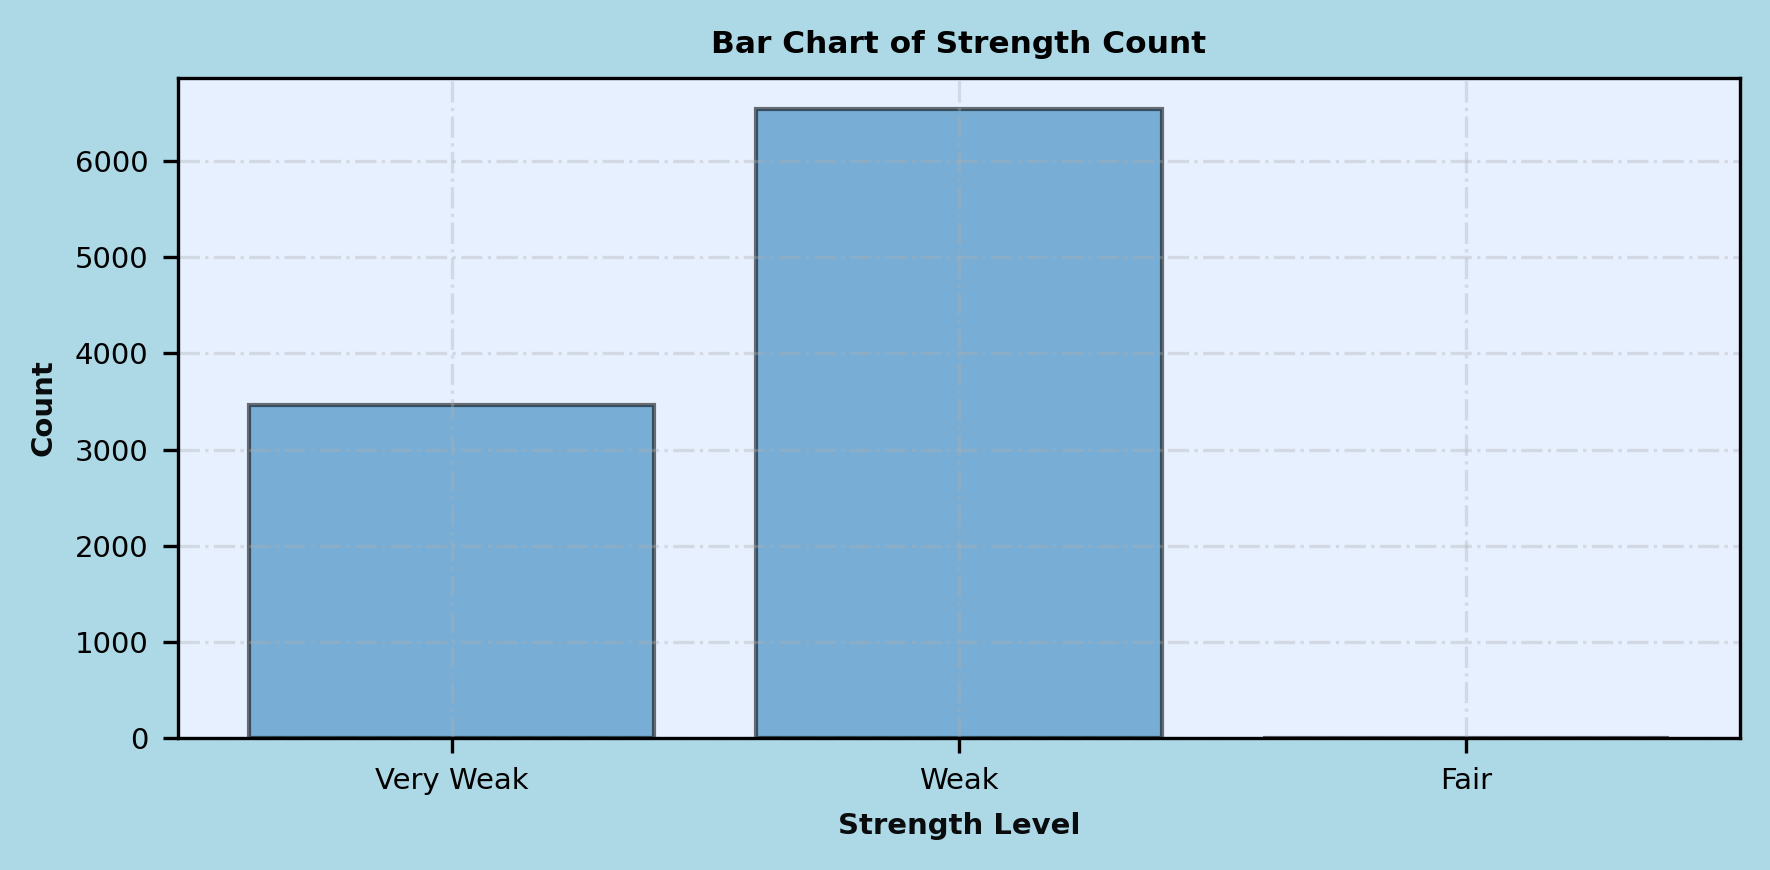

In [97]:
# Plot the bar chart
# Create figure and axes
fig, ax = plt.subplots(figsize=(6,3), dpi=300, facecolor='#ADD8E6', edgecolor='k', alpha=0.75)

# Set background color
ax.set_facecolor('#E6F0FFFF')

# Get the data and sort the index
password_strength = df_passwords['zxcvbn_score'].value_counts().sort_index()

# Plot the data
ax.bar(password_strength.index, password_strength.values, lw=1, label=None, edgecolor='black', alpha=0.55)

# Set x-axis limits and ticks
x_ticks = np.arange(0, 3, 1)
score_representation = ['Very Weak', 'Weak', 'Fair']
ax.set_xticks(x_ticks)
ax.set_xticklabels(score_representation, font='DejaVu Sans', weight=None)
ax.tick_params(axis='x', labelsize=7)

# Set y-axis limits and ticks
# y_ticks = np.arange(0, 7000, 1000) 
# ax.set_ylim(0, 6500)
# ax.set_yticks(y_ticks) 
# ax.set_yticklabels(y_ticks, font='DejaVu Sans', weight=None)
ax.tick_params(axis='y', labelsize=7)

# Add labels and title
ax.set_title('Bar Chart of Strength Count', font='DejaVu Sans', fontsize=7.5, loc='center', weight='bold')
ax.set_xlabel('Strength Level', fontsize=7, weight='bold', color='black', alpha=0.95, font='DejaVu Sans')
ax.set_ylabel('Count', fontsize=7, weight='bold', color='black', alpha=0.95, font='DejaVu Sans')

# Adds gridlines
plt.grid(True, linestyle='-.', alpha=0.35)

plt.tight_layout()

# plt.show()

In [98]:
score_value = 2
score_filter = df_passwords['zxcvbn_score'] == score_value
df_passwords.loc[score_filter, ['zxcvbn_entropy']].describe()
# df_passwords.loc[score_filter, ['zxcvbn_entropy']].tail(100)

,zxcvbn_entropy
count,1.0
mean,21.0
std,NaN
min,21.0
25%,21.0
50%,21.0
75%,21.0
max,21.0
